# MA934 Numerical Methods - Workbook 3

In [2]:
using PyPlot
using DualNumbers

include("functions3.jl");

## Question 1: Numerical differentiation

**1)** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

$f(x)=f(x)$

$f(x+h)=f(x)+hf'(x)+\frac{{{h}^{2}}}{2}f''(x)+O({{h}^{3}})$

$f(x+2h)=f(x)+2hf'(x)+\frac{4{{h}^{2}}}{2}f''(x)+O({{h}^{3}})$
 
$\Rightarrow af(x)+bf(x+h)+cf(x+2h)=af(x)+bf(x)+bhf'(x)+\frac{b{{h}^{2}}}{2}f''(x)+cf(x)+2chf'(x)+2c{{h}^{2}}f''(x)+O({{h}^{3}})$

$=(a+b+c)f(x)+(b+2c)hf'(x)+(\frac{b}{2}+2c){{h}^{2}}f''(x)+O({{h}^{3}})$

$\text{We want }a+b+c=0,\text{ }b+2c=1,\text{ }\frac{b}{2}+2c=0$

$\Rightarrow a=-\frac{3}{2},\text{ }b=2,\text{ }c=-\frac{1}{2}$

$\Rightarrow hf'(x)=-\frac{3}{2}f(x)+2f(x+h)-\frac{1}{2}f(x+2h)+O({{h}^{3}})$

$\Rightarrow f'(x)=\frac{-3f(x)+4f(x+h)-f(x+2h)}{2h}+O({{h}^{2}})$

$\Rightarrow f'(x)=\frac{-{{f}_{i+2}}+4{{f}_{i+1}}-3{{f}_{i}}}{2h}\text{is a 3-point finite difference formula for f }\!\!'\!\!\text{ (x)}$

$\text{The order of the approximation error is }O({{h}^{2}}).$

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

$\begin{align}
  & \text{The derivative of }f(x)=\sin ({{e}^{x}})\text{ is:} \\ 
 & f'(x)={{e}^{x}}\cos ({{e}^{x}}). \\ 
\end{align}$

In [3]:
fprime1=exp(1)*cos(exp(1));
println("The actual value of f'(1) is: ",fprime1,".")

The actual value of f'(1) is: -2.578349732955235.


**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?


In [4]:
x=1
errors=zeros(30)
hs=zeros(30)
for i=1:30
    h=BigFloat(2.0)^(-i)
    fprime_est=derivsinexp(x,h)
    errors[i]=abs(fprime_est-fprime1)
    hs[i]=h
end
;

In [5]:
minerror=minimum(errors)
index=find(a->a==minerror,errors)
print("The best relative (minimum) error achieved is ",minerror," and occurs with step size h=2^-",index[1],".")

The best relative (minimum) error achieved is 9.215318001502055e-11 and occurs with step size h=2^-18.

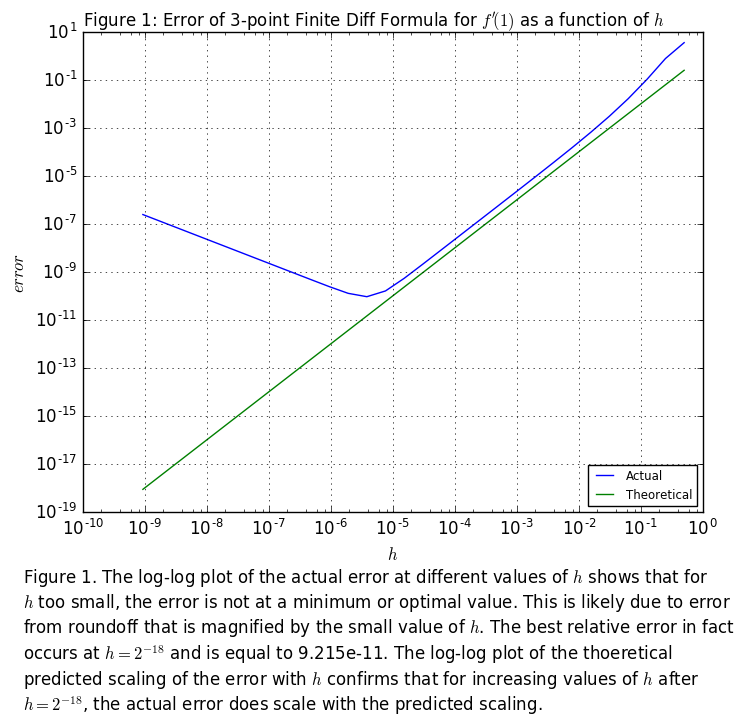

In [9]:
errortheory=hs.^2
fig,ax=PyPlot.subplots(1,1)
txt=L"Figure 1. The log-log plot of the actual error at different values of $h$ shows that for 
$h$ too small, the error is not at a minimum or optimal value. This is likely due to error
from roundoff that is magnified by the small value of $h$. The best relative error in fact 
occurs at $h=2^{-18}$ and is equal to 9.215e-11. The log-log plot of the thoeretical 
predicted scaling of the error with $h$ confirms that for increasing values of $h$ after 
$h=2^{-18}$, the actual error does scale with the predicted scaling."
fig[:text](0.05,-0.23,txt,fontsize=12)
title(L"Figure 1: Error of 3-point Finite Diff Formula for $f'(1)$ as a function of $h$",fontsize=12,loc="left")
grid("on")
ax[:set_xlabel](L"$h$", fontsize=12)
ax[:set_ylabel](L"$error$", fontsize=12)
loglog(hs,errors,label="Actual")
loglog(hs,errortheory,label="Theoretical")
legend(fontsize=8.5,loc=4);

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

In [6]:
x=Dual(1,1) # x=1+eps()
f(x)=sin(exp(x))
y=f(x);

In [7]:
println("f(x) = sin(exp(x))")
println("f'(1) = ",dualpart(y)," is the value of f'(1) from automatic differentiation.") 

f(x) = sin(exp(x))
f'(1) = -2.478349732955235 is the value of f'(1) from automatic differentiation.


In [8]:
fprime(x)=exp(x)*cos(exp(x))
actual=fprime(BigFloat(1)) #This is the exact value for f'(1)

-2.478349732955234826374071535363885214376430110699834785942585569290090655823632

In [9]:
(dualpart(y)-actual) < eps()

true

Since the difference between the dualpart of 1+$\epsilon$ and the exact value of $f'(1)$ is less than the machine epsilon for Julia, the answer is accurate to within machine precision. 